In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

In [3]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
print(df.isnull().sum().sum())

0


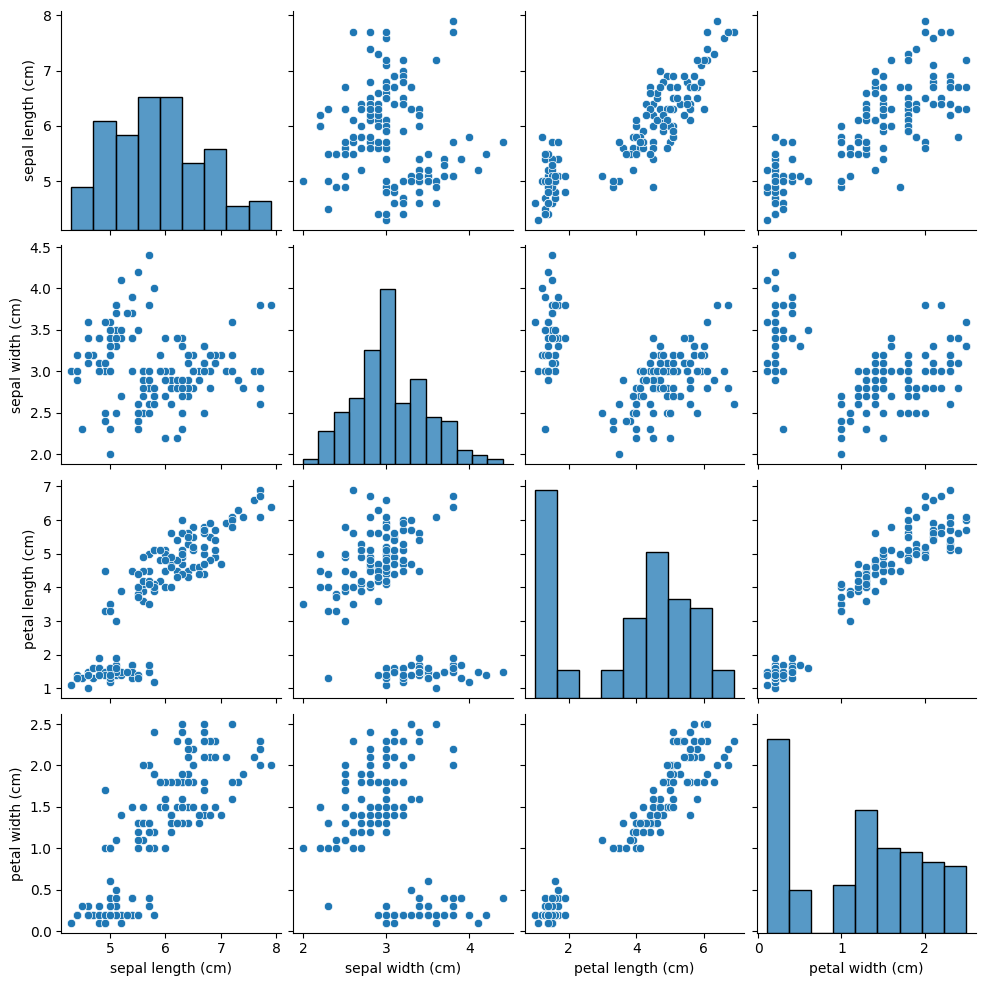

In [5]:
sns.pairplot(data=df)
plt.show()

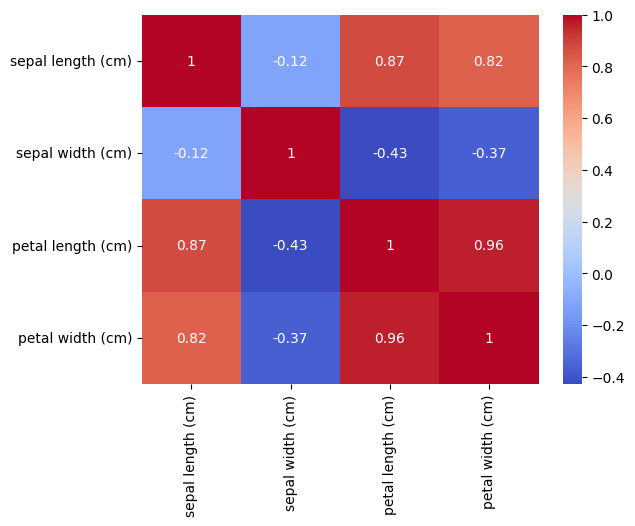

In [6]:
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [7]:
from sklearn.cluster import KMeans

wscc=[]
for i in range(2, 21):
    kn = KMeans(n_clusters=i, init='k-means++')
    kn.fit(df)
    wscc.append(kn.inertia_)

  File "C:\Program Files\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\sub

In [8]:
for i in wscc:
    print(i, end=", ")

152.34795176035792, 78.85144142614602, 57.38387326549491, 46.44618205128205, 41.722773258904844, 37.919101551956814, 30.790490832696715, 28.65957792207793, 26.60315528769476, 25.05380737382673, 24.34071121998057, 22.66105229918748, 21.384839474466023, 19.13416455912509, 18.907814443726213, 17.022009415421184, 16.97801629072682, 16.979746031746032, 15.30567658730159, 

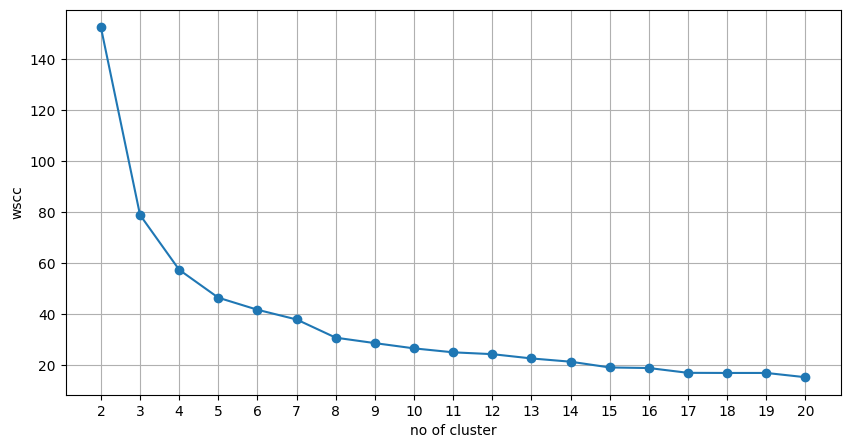

In [9]:
# Elbow Graph

plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)], wscc, marker="o")
plt.xticks([i for i in range(2,21)])
plt.xlabel('no of cluster')
plt.ylabel('wscc')
plt.grid(visible='x')
plt.show()

In [10]:
kn = KMeans(n_clusters=3)
kn.fit(df)

KMeans(n_clusters=3)

In [12]:
df['target'] = kn.fit_predict(df)

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


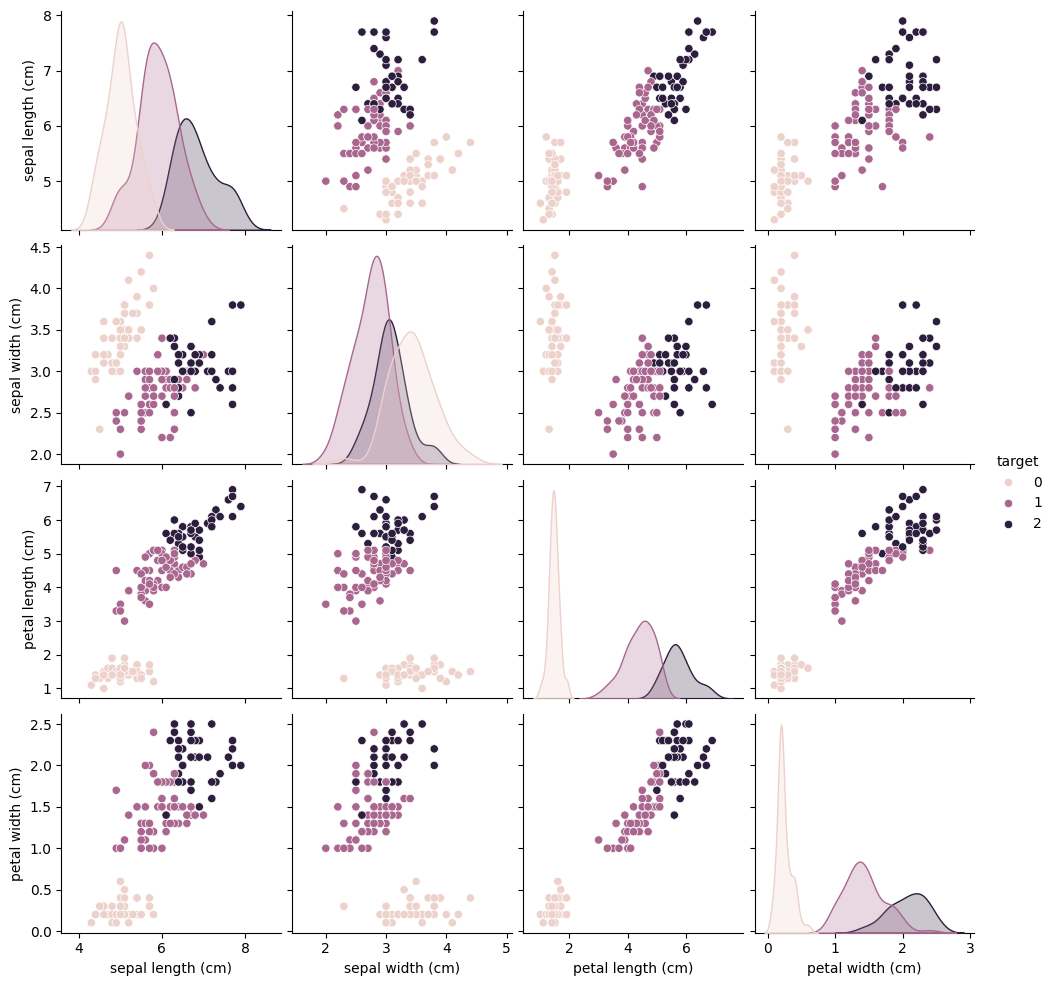

In [14]:
sns.pairplot(data=df, hue='target')
plt.show()